# Generalities for GANs

* Import libraries
* Run on GPU if possible
* Create data loaders

In [1]:
from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
from IPython.display import Image, display
import matplotlib.pyplot as plt

# create directory to save results
!mkdir results

# script parameters
batch_size = 128
log_interval = 100

# run on GPU if possible
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")

# create data loaders
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



# Neural Network class

* Generator
* Discriminator


In [2]:
# Generator Network
class Generator(nn.Module):

    # declare layers
    def __init__(self):
        super(Generator, self).__init__()

        # dummy assignment until this function is filled in
        self.fc1 = nn.Linear(20, 400)
        self.fc2 = nn.Linear(400, 784)

    # Forward: one ReLU hidden layer of 400 nodes, one Sigmoid output layer of 784 nodes
    def forward(self, z):

        # dummy assignment until this function is filled in
        z = F.relu(self.fc1(z))
        probabilities = torch.sigmoid(self.fc2(z))
        return probabilities

# Discriminator Network
class Discriminator(nn.Module):

    # declare layers
    def __init__(self):
        super(Discriminator, self).__init__()

        # dummy assignment until this function is filled in
        self.fc1 = nn.Linear(784, 400)
        self.fc2 = nn.Linear(400, 1)

    # Forward: one ReLU hidden layer of 400 nodes, one Sigmoid output layer of 1 node
    def forward(self, x):

        # dummy assignment until this function is filled in
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        probabilities = torch.sigmoid(self.fc2(x))
        return probabilities

# Loss Function

In [7]:
# GAN Loss Function
#
# Inputs:
#    predictions: array of probabilities indicating whether the images are real or fake 
#    targets: array of 1s (real image) and 0s (fake image)
#
# Output:
#    BCE: binary cross entropy (scalar)
#
def gan_loss_function(predictions, targets):
    bce_loss = nn.BCELoss()
    # dummy assignment until this function is filled in
    BCE = bce_loss(predictions, targets)
    return BCE

# Training

In [8]:
# GAN Training
#
# Have a look at the following tutorial: https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html
#
# Inputs:
#    epoch: epoch #
#    generator: generator network
#    generator_optimizer: generator optimizer
#    discriminator: discriminator network
#    discriminator_optimizer: discriminator optimizer
#
# Outputs:
#    average_generator_loss: binary cross entropy (scalar)
#    average_discriminator_loss: binary cross entropy (scalar)
#
def gan_train(epoch, generator, generator_optimizer, discriminator, discriminator_optimizer):
    generator.train()
    discriminator.train()
    # dummy assignment until this function is filled in
    total_generator_loss = 0 
    total_discriminator_loss = 0 
    average_discriminator_loss = 0
    average_generator_loss = 0
    num_batches = len(train_loader)
    for batch_idx, (real_images, _) in enumerate(train_loader):
      batch_size = real_images.size(0)
      fake_images = generator(torch.randn(batch_size, 20).to(device))
      fake_targets = torch.zeros(batch_size, 1).to(device)
      real_images = real_images.to(device)
      real_targets = torch.ones(batch_size, 1).to(device)
      
      discriminator_optimizer.zero_grad()
      real_preds = discriminator(real_images)
      disc_real_loss = gan_loss_function(real_preds, real_targets)
      fake_preds = discriminator(fake_images.detach())
      disc_fake_loss = gan_loss_function(fake_preds, fake_targets)
      discriminator_loss = (disc_real_loss + disc_fake_loss)
      total_discriminator_loss += discriminator_loss.item()
      discriminator_loss.backward()
      discriminator_optimizer.step()

      generator_optimizer.zero_grad()
      fake_images = generator(torch.randn(batch_size, 20).to(device))
      predictions = discriminator(fake_images)
      targets = torch.ones(batch_size, 1).to(device)
      generator_loss = gan_loss_function(predictions, targets)
      generator_loss.backward()
      generator_optimizer.step()
      total_generator_loss += generator_loss.item()
      

    average_generator_loss = total_generator_loss / num_batches
    average_discriminator_loss = total_discriminator_loss / num_batches

        
    return average_generator_loss, average_discriminator_loss


# Testing


In [9]:
# GAN Test
#
# Have a look at the following tutorial: https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html
#
# Inputs:
#    epoch: epoch #
#    generator: generator network
#    discriminator: discriminator network
#
# Outputs:
#    average_generator_loss: binary cross entropy (scalar)
#    average_discriminator_loss: binary cross entropy (scalar)
#
def gan_test(epoch, generator, discriminator):
    generator.eval()
    discriminator.eval()
    total_generator_loss = 0 
    total_discriminator_loss = 0 
    average_discriminator_loss = 0
    average_generator_loss = 0
    with torch.no_grad():
        num_batches = len(test_loader)
        for batch_idx, (real_images, _) in enumerate(test_loader):
          batch_size = real_images.size(0)
          fake_images = generator(torch.randn(batch_size, 20).to(device))
          real_images = real_images.to(device)
          real_preds = discriminator(real_images)
          real_targets = torch.ones(batch_size, 1).to(device)
          fake_targets = torch.zeros(batch_size, 1).to(device)
          fake_preds = discriminator(fake_images.detach())
          disc_real_loss = gan_loss_function(real_preds, real_targets)
          disc_fake_loss = gan_loss_function(fake_preds, fake_targets)
          discriminator_loss = (disc_real_loss + disc_fake_loss) / 2
          total_discriminator_loss += discriminator_loss.item()

          generator_loss = gan_loss_function(fake_preds, real_targets)
          total_generator_loss += generator_loss.item()

        average_generator_loss = total_generator_loss / num_batches
        average_discriminator_loss = total_discriminator_loss / num_batches
    return average_generator_loss, average_discriminator_loss

# Main

Epoch  1
Sample of generated images


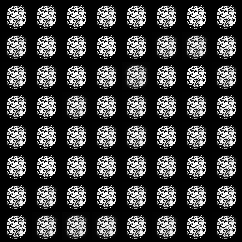



Epoch  2
Sample of generated images


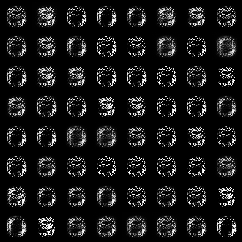



Epoch  3
Sample of generated images


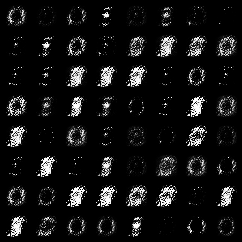



Epoch  4
Sample of generated images


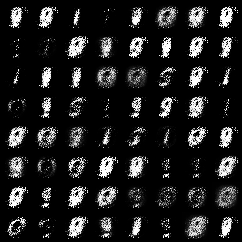



Epoch  5
Sample of generated images


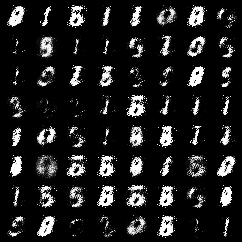



Epoch  6
Sample of generated images


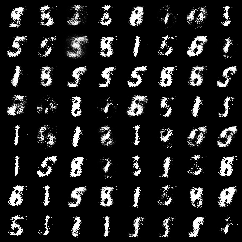



Epoch  7
Sample of generated images


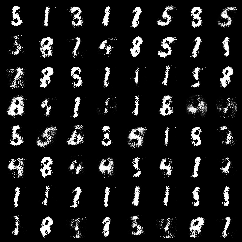



Epoch  8
Sample of generated images


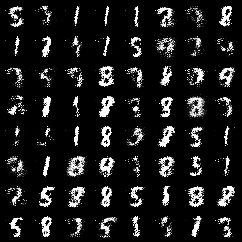



Epoch  9
Sample of generated images


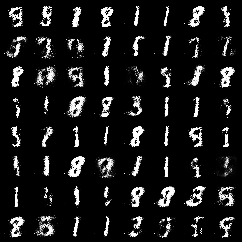



Epoch  10
Sample of generated images


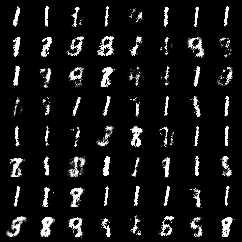



Epoch  11
Sample of generated images


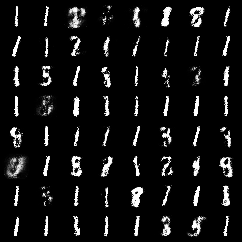



Epoch  12
Sample of generated images


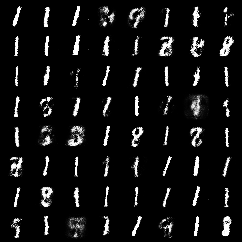



Epoch  13
Sample of generated images


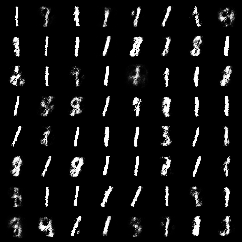



Epoch  14
Sample of generated images


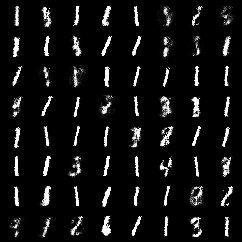



Epoch  15
Sample of generated images


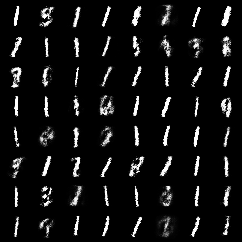



Epoch  16
Sample of generated images


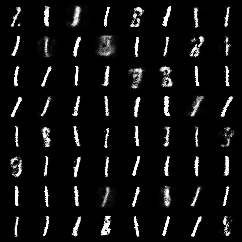



Epoch  17
Sample of generated images


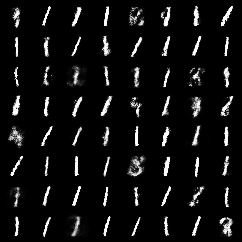



Epoch  18
Sample of generated images


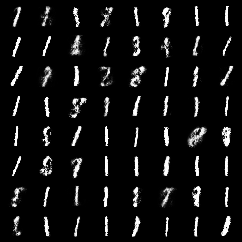



Epoch  19
Sample of generated images


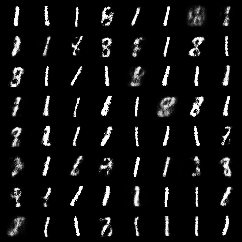



Epoch  20
Sample of generated images


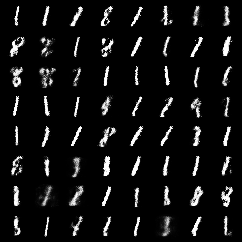



Epoch  21
Sample of generated images


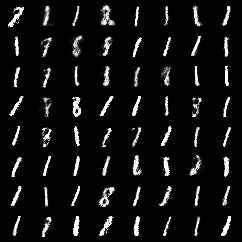



Epoch  22
Sample of generated images


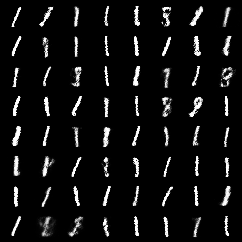



Epoch  23
Sample of generated images


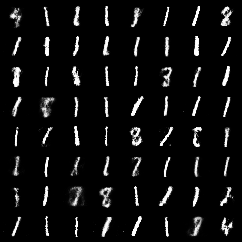



Epoch  24
Sample of generated images


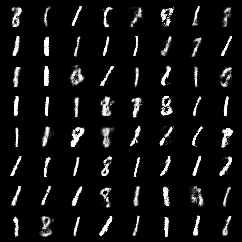



Epoch  25
Sample of generated images


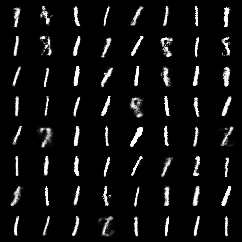



Epoch  26
Sample of generated images


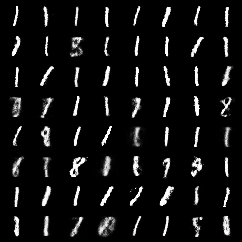



Epoch  27
Sample of generated images


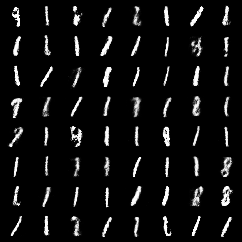



Epoch  28
Sample of generated images


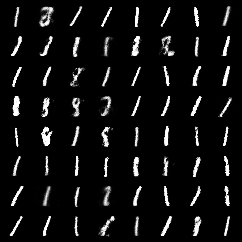



Epoch  29
Sample of generated images


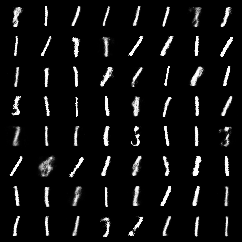



Epoch  30
Sample of generated images


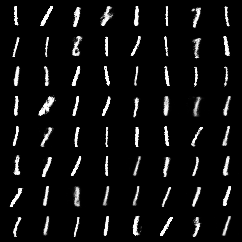



Epoch  31
Sample of generated images


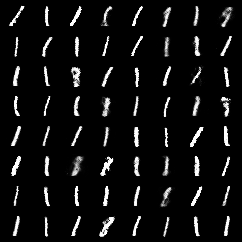



Epoch  32
Sample of generated images


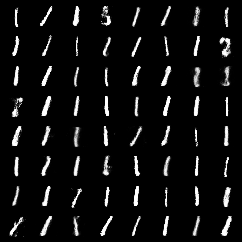



Epoch  33
Sample of generated images


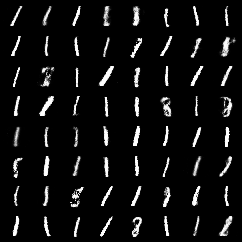



Epoch  34
Sample of generated images


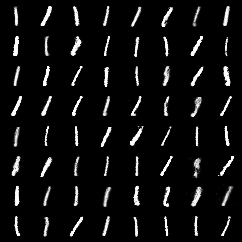



Epoch  35
Sample of generated images


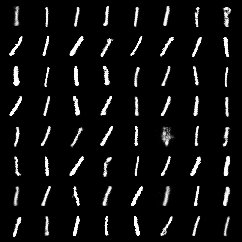



Epoch  36
Sample of generated images


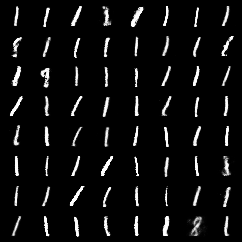



Epoch  37
Sample of generated images


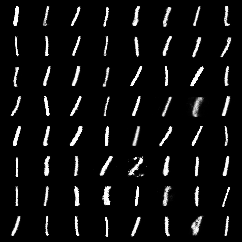



Epoch  38
Sample of generated images


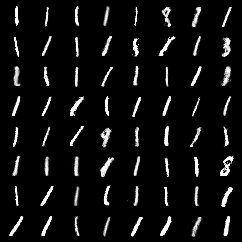



Epoch  39
Sample of generated images


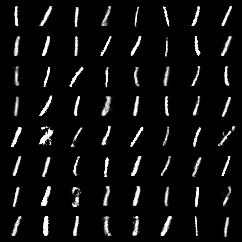



Epoch  40
Sample of generated images


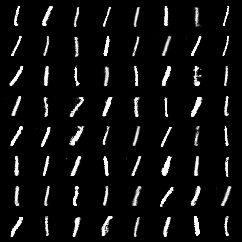



Epoch  41
Sample of generated images


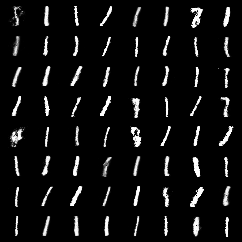



Epoch  42
Sample of generated images


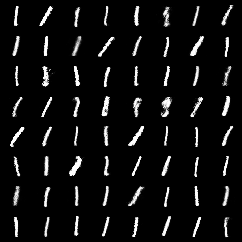



Epoch  43
Sample of generated images


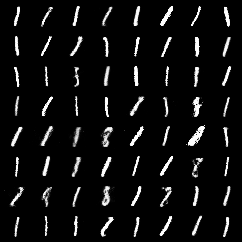



Epoch  44
Sample of generated images


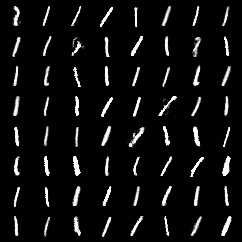



Epoch  45
Sample of generated images


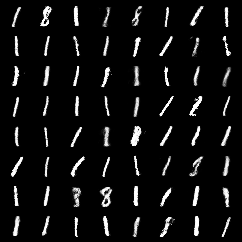



Epoch  46
Sample of generated images


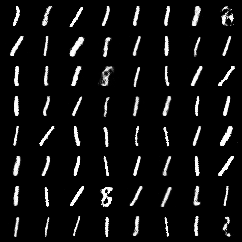



Epoch  47
Sample of generated images


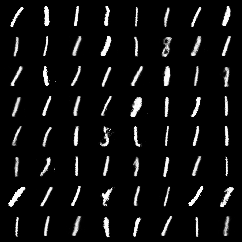



Epoch  48
Sample of generated images


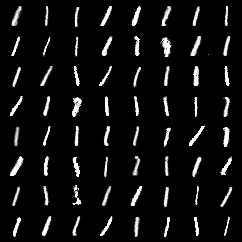



Epoch  49
Sample of generated images


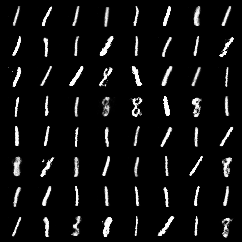



Epoch  50
Sample of generated images


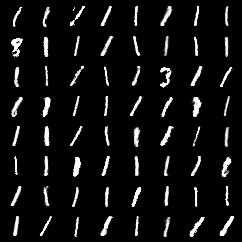

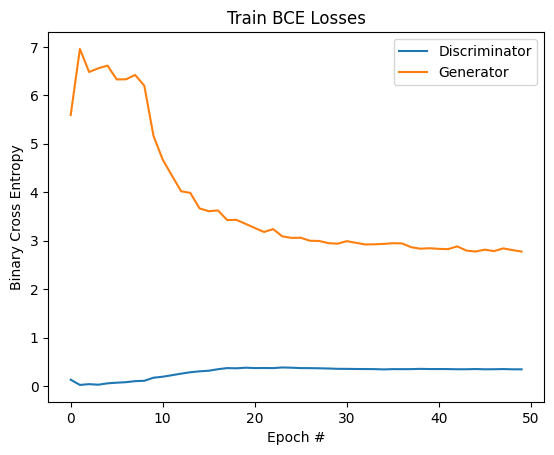

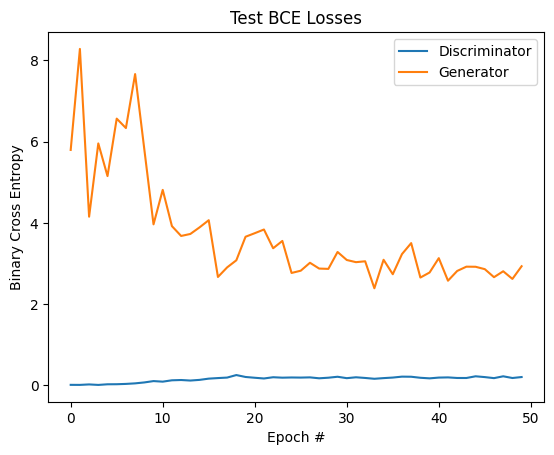

In [10]:
# train and test gan
epochs = 50
discriminator_average_train_losses = []
discriminator_average_test_losses = []
generator_average_train_losses = []
generator_average_test_losses = []
generator_model = Generator().to(device)
generator_optimizer = optim.Adam(generator_model.parameters(), lr=1e-3)
discriminator_model = Discriminator().to(device)
discriminator_optimizer = optim.Adam(discriminator_model.parameters(), lr=1e-3)
for epoch in range(1, epochs + 1):
    generator_average_train_loss, discriminator_average_train_loss = gan_train(epoch, generator_model, generator_optimizer, discriminator_model, discriminator_optimizer)
    discriminator_average_train_losses.append(discriminator_average_train_loss)
    generator_average_train_losses.append(generator_average_train_loss)
    generator_average_test_loss, discriminator_average_test_loss = gan_test(epoch, generator_model, discriminator_model)
    discriminator_average_test_losses.append(discriminator_average_test_loss)
    generator_average_test_losses.append(generator_average_test_loss)
    with torch.no_grad():
        sample = torch.randn(64, 20).to(device)
        sample = generator_model(sample).cpu()
        save_image(sample.view(64, 1, 28, 28),'results/sample_' + str(epoch) + '.png')
        print('Epoch ',epoch)
        print('Sample of generated images')
        display(Image('results/sample_' + str(epoch) + '.png'))
        print('\n')

# Plot Train losses
plt.plot(discriminator_average_train_losses)
plt.plot(generator_average_train_losses)
plt.title('Train BCE Losses')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch #')
plt.legend(['Discriminator','Generator'], loc='upper right')
plt.show()

# Plot Test Losses
plt.plot(discriminator_average_test_losses)
plt.plot(generator_average_test_losses)
plt.title('Test BCE Losses')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch #')
plt.legend(['Discriminator','Generator'], loc='upper right')
plt.show()


VAEs are based on an encoder-decoder architecture, where the encoder maps an input image to a lower-dimensional latent space, and the decoder maps a sample from the latent space back to the original input image space. VAEs optimize a loss function that balances reconstruction error and regularization of the latent space, resulting in a smooth continuous latent space. VAEs generate new samples by sampling from this latent space and feeding them to the decoder.


GANs, on the other hand, generate images by training a generator network to generate realistic-looking images that can fool a discriminator network, which learns to distinguish between real and generated images. During training, the generator tries to minimize the difference between the distributions of the generated images and the real images, while the discriminator tries to maximize the difference between the distributions.

One major difference between VAEs and GANs is that VAEs tend to produce smoother and blurrier images, while GANs tend to produce sharper and more realistic images with more fine-grained details. This is because VAEs use a reconstruction loss to ensure that the generated images are similar to the input images, while GANs use a discriminator to learn the distribution of the real images and generate images that are similar to that distribution.

Another difference is that VAEs tend to produce more diverse images, while GANs tend to produce images that are similar to the training data. This is because VAEs learn a probabilistic model of the input data, which allows them to generate a wide range of images, while GANs only generate images that are similar to the training data.

In summary, while GANs are generally known to produce higher quality images, VAEs are better suited for tasks that require a smoother and more continuous latent space or generating a wider range of samples.